In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [8]:
R0s = np.arange(1.5, 3.3, 0.1)
rs = np.array([20, 10., 2, 1, 0.5, 0.2, 0.1, 0.05, 0.025])

param_grid = {'R0': R0s, 'r' : rs}

grid = ParameterGrid(param_grid)

para_dict = list(grid)

In [11]:
len_R0 = len(R0s)
len_r = len(rs)

In [6]:
file_dir = '/Users/qingyao/Documents/branching_data/simulation/python_cutoff/'

In [13]:
def load_gzipped_numpy(filename):
    try:
        with gzip.open(filename, 'rb') as f:
            return np.load(f, allow_pickle=True)
    except FileNotFoundError:
        return [0]

In [7]:
pop = np.loadtxt('pop_new.csv')
### analyse the data

In [20]:
# Newinf_mean =  np.zeros((len_R0,len_r))
# Newinf_std =  np.zeros((len_R0,len_r))

Numcounty_mean =  np.zeros((len_R0,len_r))
Numcounty_std =  np.zeros((len_R0,len_r))

export_dir = '/Users/qingyao/Documents/branching_data/simulation/python_cutoff/'
for R0_idx in range(len_R0):
    R0 = R0s[R0_idx]
    
    Ensembles = np.zeros((len(rs),300,3142,60))
    for r_idx in range(len_r):
    #     print(r_idx)
        r = rs[r_idx]
        print(R0,r)
        sub_export_dir = export_dir+'branching_R0-{}_r-{}/'.format(np.round(R0,2),np.round(r,3))
        for i in range(300):
            export_names = sub_export_dir+'NewInf_R0-{}_r-{}_{}.npy.gz'.format(np.round(R0,2),np.round(r,3),(i+1))
            temp = load_gzipped_numpy(export_names)
            if len(temp) == 1:
                print(r, i)
            else:
                Ensembles[r_idx,i,:,:] = temp
        
        E_daily_per_pop = Ensembles[r_idx,:,:,-1]/pop[None,:]*100000
        num_county = np.sum(E_daily_per_pop>10,axis=1)

        mean_county = np.mean(num_county,axis=0)
        Numcounty_mean[R0_idx,r_idx] = mean_county

        std_county = np.std(num_county,axis=0)
        Numcounty_std[R0_idx,r_idx] = std_county
            
#         Newinf_mean[R0_idx,r_idx] = np.mean(Ensembles[r_idx,:,:,-1],axis=0)
#         Newinf_std[R0_idx,r_idx] = np.std(Ensembles[r_idx,:,:,-1],axis=0)

1.5 20.0
1.5 10.0
1.5 2.0
1.5 1.0
1.5 0.5
1.5 0.2
1.5 0.1
1.5 0.05
1.5 0.025
1.6 20.0
1.6 10.0
1.6 2.0
1.6 1.0
1.6 0.5
1.6 0.2
1.6 0.1
1.6 0.05
1.6 0.025
1.7000000000000002 20.0
1.7000000000000002 10.0
1.7000000000000002 2.0
1.7000000000000002 1.0
1.7000000000000002 0.5
1.7000000000000002 0.2
1.7000000000000002 0.1
1.7000000000000002 0.05
1.7000000000000002 0.025
1.8000000000000003 20.0
1.8000000000000003 10.0
1.8000000000000003 2.0
1.8000000000000003 1.0
1.8000000000000003 0.5
1.8000000000000003 0.2
1.8000000000000003 0.1
1.8000000000000003 0.05
1.8000000000000003 0.025
1.9000000000000004 20.0
1.9000000000000004 10.0
1.9000000000000004 2.0
1.9000000000000004 1.0
1.9000000000000004 0.5
1.9000000000000004 0.2
1.9000000000000004 0.1
1.9000000000000004 0.05
1.9000000000000004 0.025
2.0000000000000004 20.0
2.0000000000000004 10.0
2.0000000000000004 2.0
2.0000000000000004 1.0
2.0000000000000004 0.5
2.0000000000000004 0.2
2.0000000000000004 0.1
2.0000000000000004 0.05
2.0000000000000004 0.02

In [9]:
# for j in range(1,6):
#     Numcounty_mean[:,j] = np.loadtxt('Numcounty_mean{}'.format(j))
# for j in range(1,6):
#     Numcounty_std[:,j] = np.loadtxt('Numcounty_std{}'.format(j))
# Numcounty_mean = np.loadtxt('Numcounty_mean60.txt')
# Numcounty_std = np.loadtxt('Numcounty_std60.txt')

In [10]:
np.savetxt('Numcounty_mean60.txt', Numcounty_mean)
np.savetxt('Numcounty_std60.txt', Numcounty_std)

In [34]:
rs

array([20.   , 10.   ,  2.   ,  1.   ,  0.5  ,  0.2  ,  0.1  ,  0.05 ,
        0.025])

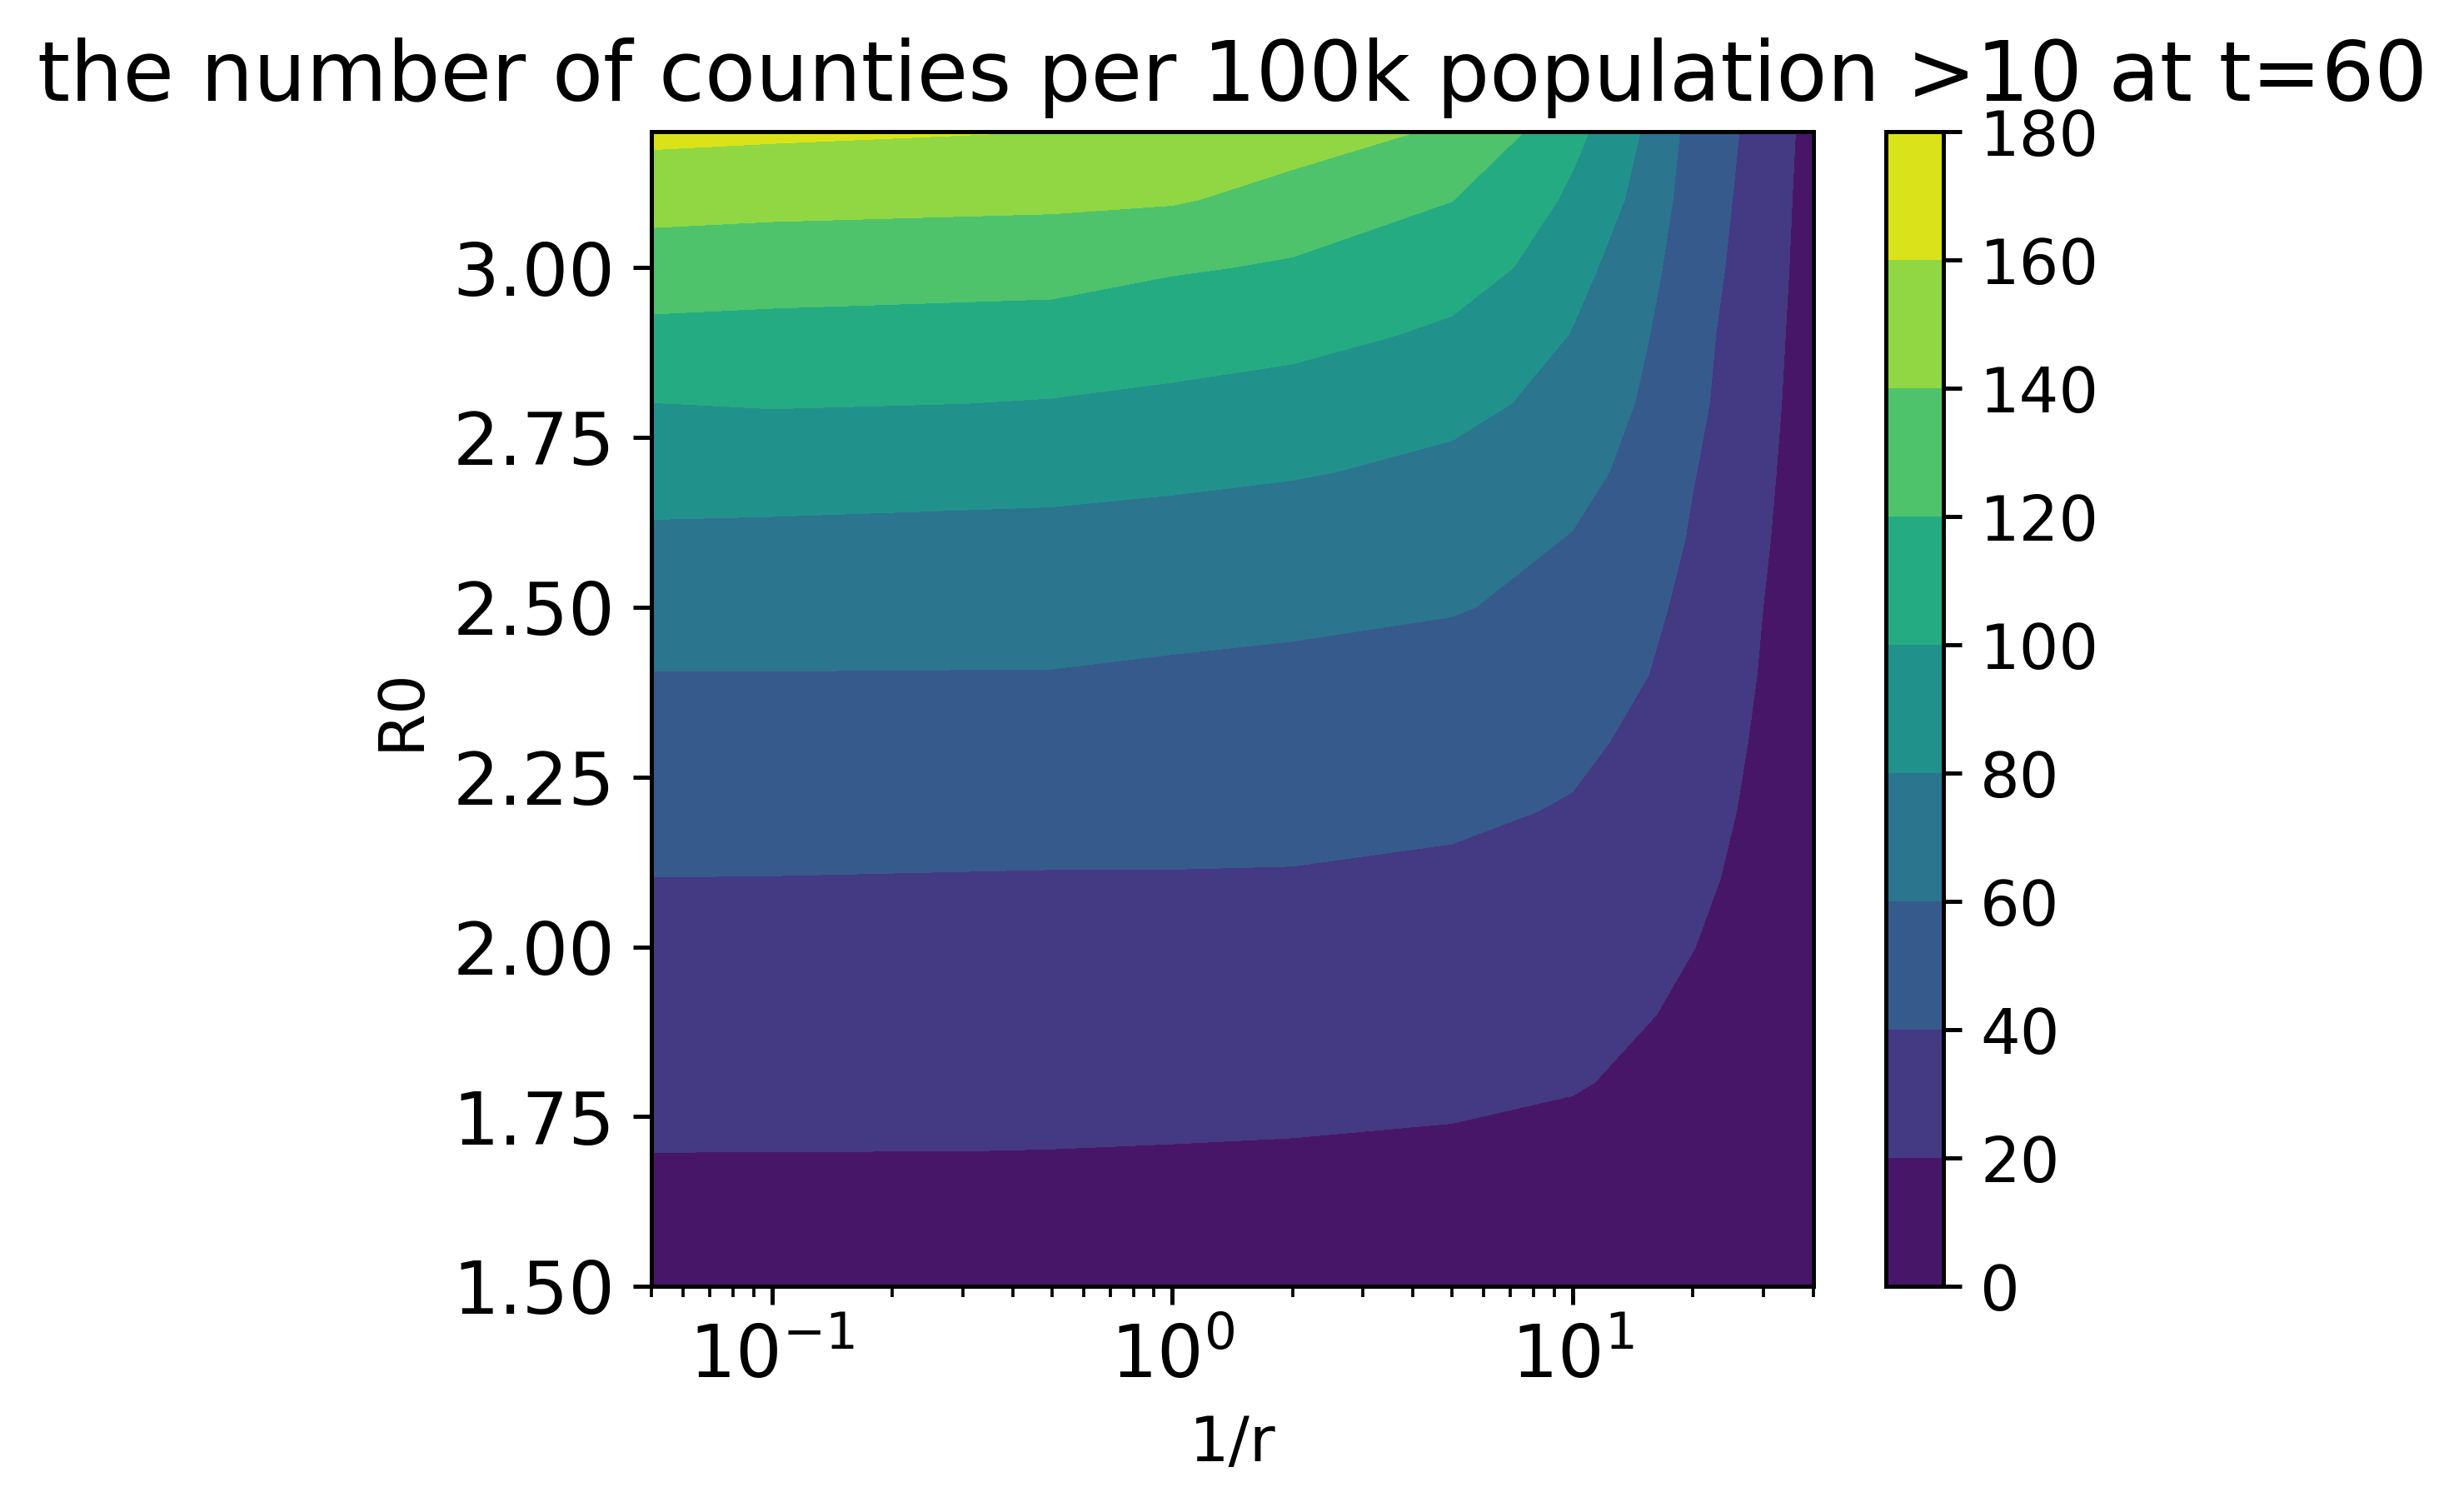

In [35]:
x = 1/rs
y = R0s

X, Y = np.meshgrid(x, y)

Z = Numcounty_mean
# Z = Numcounty_std


fig, ax = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax.contourf(X, Y, Z, 10, cmap=plt.cm.viridis) #,vmin=0, vmax=36
# c = ax.pcolormesh(X, Y, Z, cmap=plt.cm.viridis)
# c = ax.imshow(Z, cmap=plt.cm.viridis, origin='lower', aspect='auto', extent=[X.min(), X.max(), Y.min(), Y.max()])

# Add colorbar
cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
# cbh = plt.colorbar(c, orientation='vertical', pad=0.05)
# cbh.ax.set_yticklabels([10, 50, 100])
cbh.ax.tick_params(labelsize=12)

# Turn off grid and set shading
# plt.grid(False)
# contour.set_edgecolor('face') # remove contour lines

# Set title and axis labels
plt.title('the number of counties per 100k population >10 at t=60', fontsize=16)
plt.xlabel('1/r', fontsize=12)
plt.ylabel('R0', fontsize=12)
# ax2.set_xticklabels([1/0.2,1/0.4,])
# ax.set_xticks(np.linspace(x.min(), x.max(), 9))
# ax.set_xticklabels(1/rs)
plt.xscale('log')


# Set axis limits and font size
plt.xlim([x[0], x[-1]])
plt.ylim([y[0], y[-1]])
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()